# Ali Flu Project 10x - B cells from Blood Samples from P04, P05 and P11 (Year 1 and Year 2) without integration
* Hailong

In [1]:
## load libraries ####
rm(list=ls())
start_time <- Sys.time()
suppressPackageStartupMessages(library("dplyr"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("Seurat"))
suppressPackageStartupMessages(library("cowplot"))
suppressPackageStartupMessages(library("pheatmap"))
suppressPackageStartupMessages(library("RColorBrewer"))
suppressPackageStartupMessages(library("Matrix"))
suppressPackageStartupMessages(library("alakazam"))
suppressPackageStartupMessages(library("tidyr"))
suppressPackageStartupMessages(library("gridExtra"))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("scales"))
sampleCat = "Blood"
path.work = file.path("D:","Storage","Ali","manuscript","supplFigures")
path.data = file.path("C:","Project","workspace", "AliFlu","10x", "data")
path.data2 = file.path("D:","Storage","Ali","10x", "Year2", "GEX", sampleCat)
setwd(path.work)
feature.cols = c("lightgray", "blue")

# Load mappings
mapping.file = file.path(path.data, "data_mapping", "map_GEX.txt")
mappings = read.delim(mapping.file, stringsAsFactors = FALSE, as.is=T)
mappings = filter(mappings, SampleType == "IgD-BCell" | SampleType == "PBMC" | SampleType == "PBMC-ASC")
dim(mappings)

[1] 38  8

In [4]:
immune.combined <- readRDS(file.path(path.data2,"Blood_B_beforeAnnotation.GEX.rds"))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



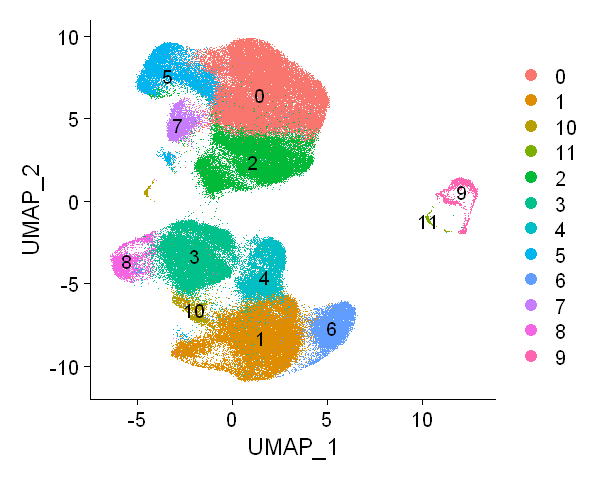

In [7]:
options(repr.plot.width=5, repr.plot.height=4)
DimPlot(object = immune.combined, reduction = "umap", label = TRUE)

In [11]:
pdf("UMAP_Blood_B_beforeAnnotation.pdf", width=5, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", label = FALSE)
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

In [12]:
pdf("UMAP_Blood_B_beforeAnnotation_bySubject.pdf", width=12, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", split.by = "subject")
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



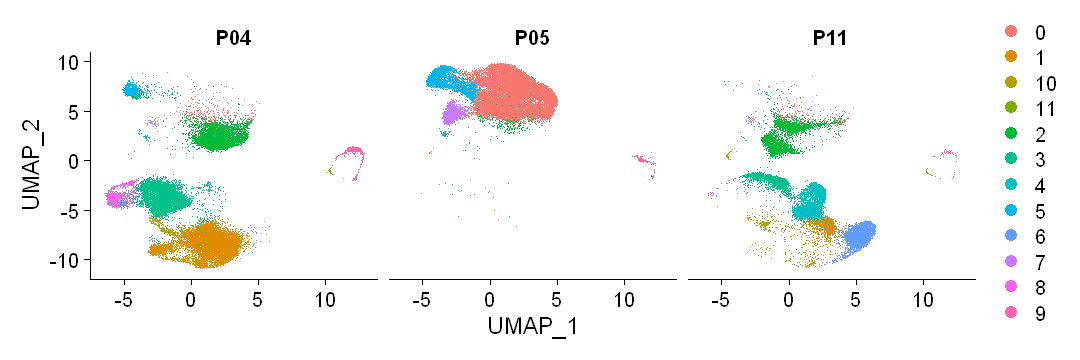

In [8]:
options(repr.plot.width=9, repr.plot.height=3)
DimPlot(object = immune.combined, reduction = "umap", split.by = "subject")

## Check marker genes

In [13]:
B <- c("MS4A1", "IGKC","CD79A", "CD79B", "CD19")
RMB <- c("TNFRSF13B", "CD27", "CD24") #Resting Memory B
naive.B <- c("TCL1A", "IL4R",  "CCR7", "IGHM", "IGHD") #Naive B
plasma <- c("CD38", "CD27","FKBP11","TRIB1","SDC1","XBP1", "IRF4", "SEC11C", "JCHAIN", "PRDM1")
GC.B <- c("BCL6", "RGS13", "MEF2B", "STMN1", "ELL3", "SERPINA9")
ABC <- c("TBX21", "FCRL5", "ITGAX", "NKG7", "ZEB2", "CR2")# the lack of CR2 for activated B cells (ABCs);
T <- c("CD3D", "CD3E","CD4", "IL7R", "CD8A")
NK <- c("GZMB", "GNLY", "NKG7", "NCAM1")
CD14.Monocyte <-c("CD14","LYZ")
DC <- c("FCER1A", "CST3")
platlet <- "PPBP"
dividing  <- c("MKI67", "CDK1") # Dividing cells 
  
all.markers = unique(c(B, RMB, naive.B, plasma, GC.B, ABC, T, NK, CD14.Monocyte, DC, platlet, dividing))
# BCL6, RGS13, MEF2B, STMN1, ELL3 and SERPINA9 for GC B cells;  
# XBP1, IRF4, SEC11C,FKBP11, JCHAIN and PRDM1 for PBs; 
# TCL1A, IL4R, CCR7, IGHM, and IGHD for naive B cells; 
# TBX21, FCRL5, ITGAX, NKG7, ZEB2, and the lack of CR2 for activated B cells; 
# TNFRSF13B, CD27 and CD24 for RMB cells.
all.B = c("BCL6", "RGS13", "MEF2B", "STMN1", "ELL3", "SERPINA9", 
          "XBP1", "IRF4", "SEC11C","FKBP11", "JCHAIN", "PRDM1", 
            "TCL1A", "IL4R", "CCR7", "IGHM", "IGHD",
            "TBX21", "FCRL5", "ITGAX", "NKG7", "ZEB2","CR2", 
            "TNFRSF13B", "CD27", "CD24")

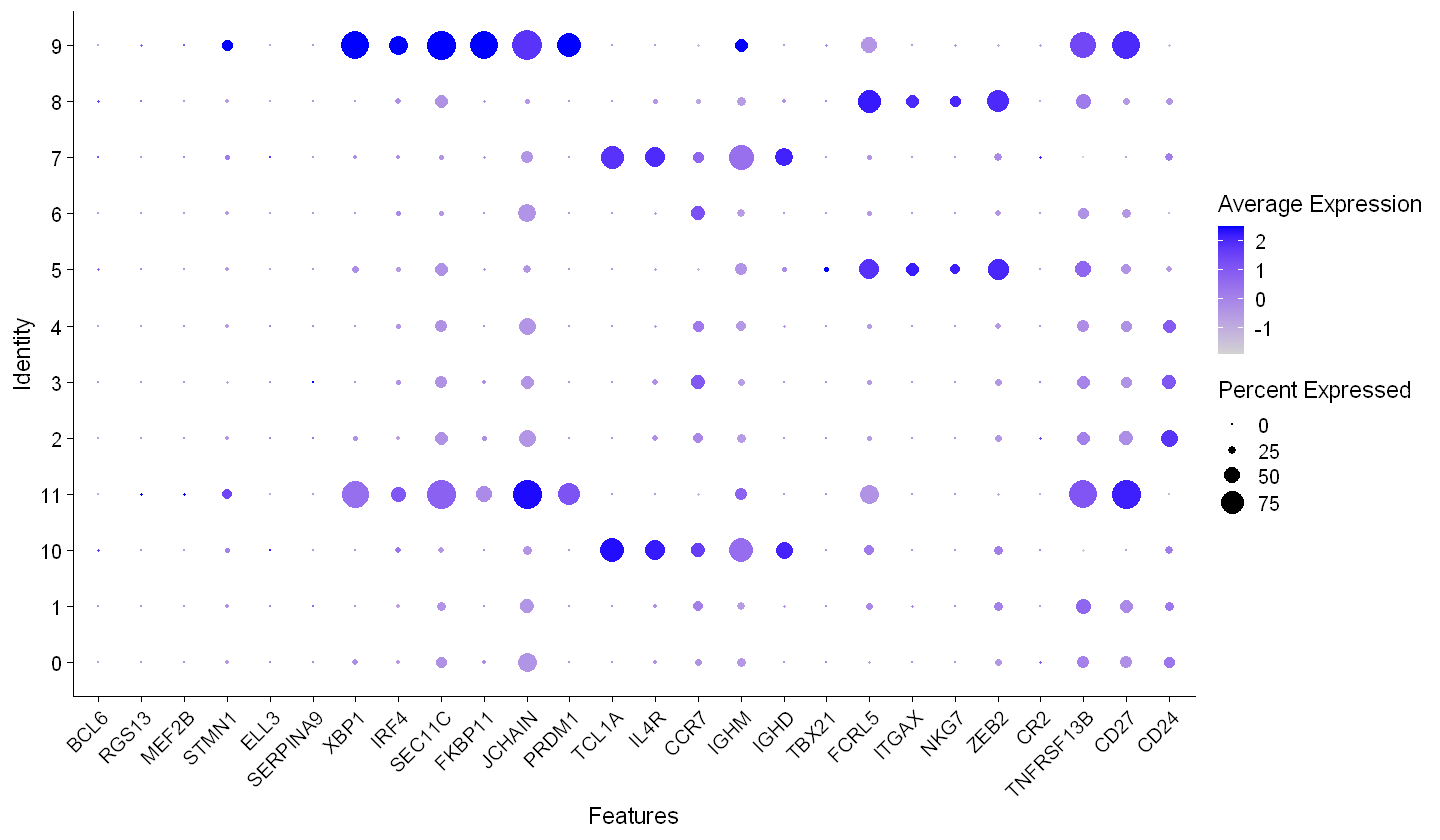

In [14]:
options(repr.plot.width=12, repr.plot.height=7)
DotPlot(immune.combined, assay = "RNA", features =  unique(all.B), dot.scale = 8) + RotatedAxis()

In [16]:
pdf("DotPlot_Blood_B_beforeAnnotation.pdf", width=8, height=4, useDingbats=FALSE)
DotPlot(immune.combined, assay = "RNA", features =  unique(all.B), dot.scale = 5) + RotatedAxis()
dev.off()

png 
  2

### B cell markers

options(repr.plot.width=12, repr.plot.height=6)
FeaturePlot(object = immune.combined, features = B, ncol =3,cols = feature.cols, min.cutoff = 0)

### Plasma markers

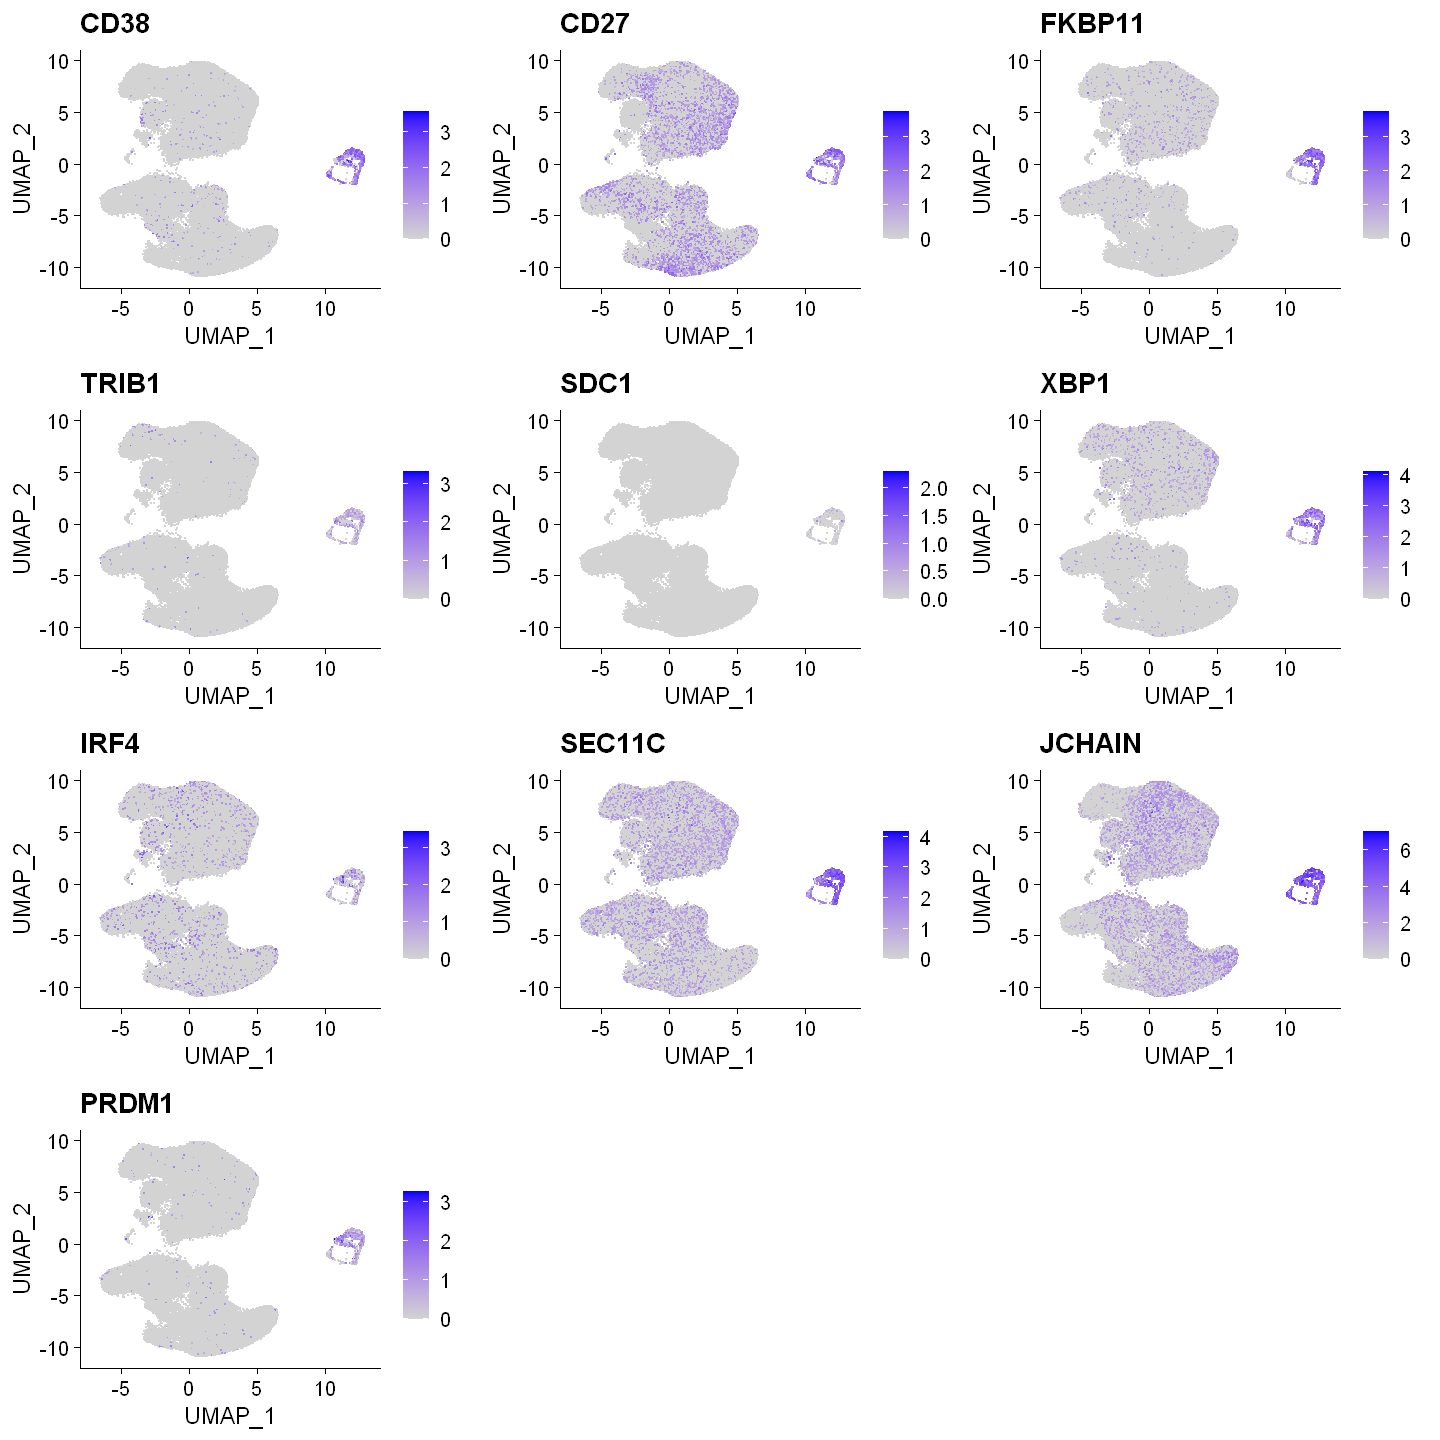

In [50]:
options(repr.plot.width=12, repr.plot.height=12)
FeaturePlot(object = immune.combined, features = plasma, ncol =3,cols = feature.cols, min.cutoff = 0)

### Resting Memory B cells

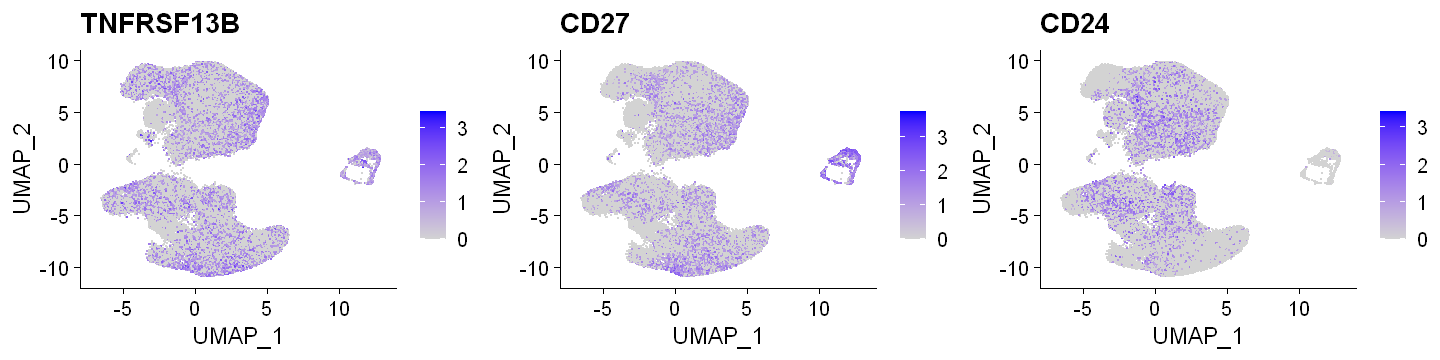

In [51]:
options(repr.plot.width=12, repr.plot.height=3)
FeaturePlot(object = immune.combined, features = RMB, ncol =3,cols = feature.cols, min.cutoff = 0)

### Naive B cells

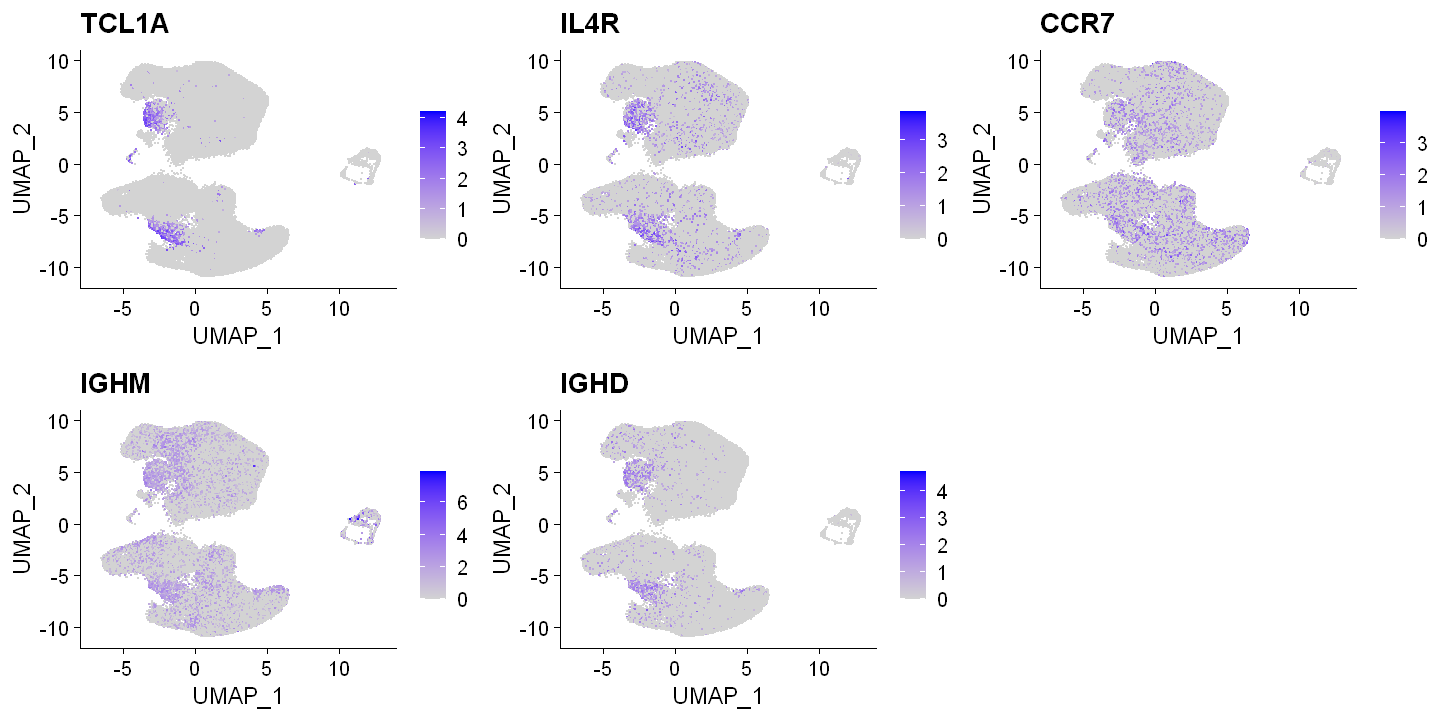

In [52]:
options(repr.plot.width=12, repr.plot.height=6)
FeaturePlot(object = immune.combined, features = naive.B, ncol =3,cols = feature.cols, min.cutoff = 0)

### Germinal Center B cells

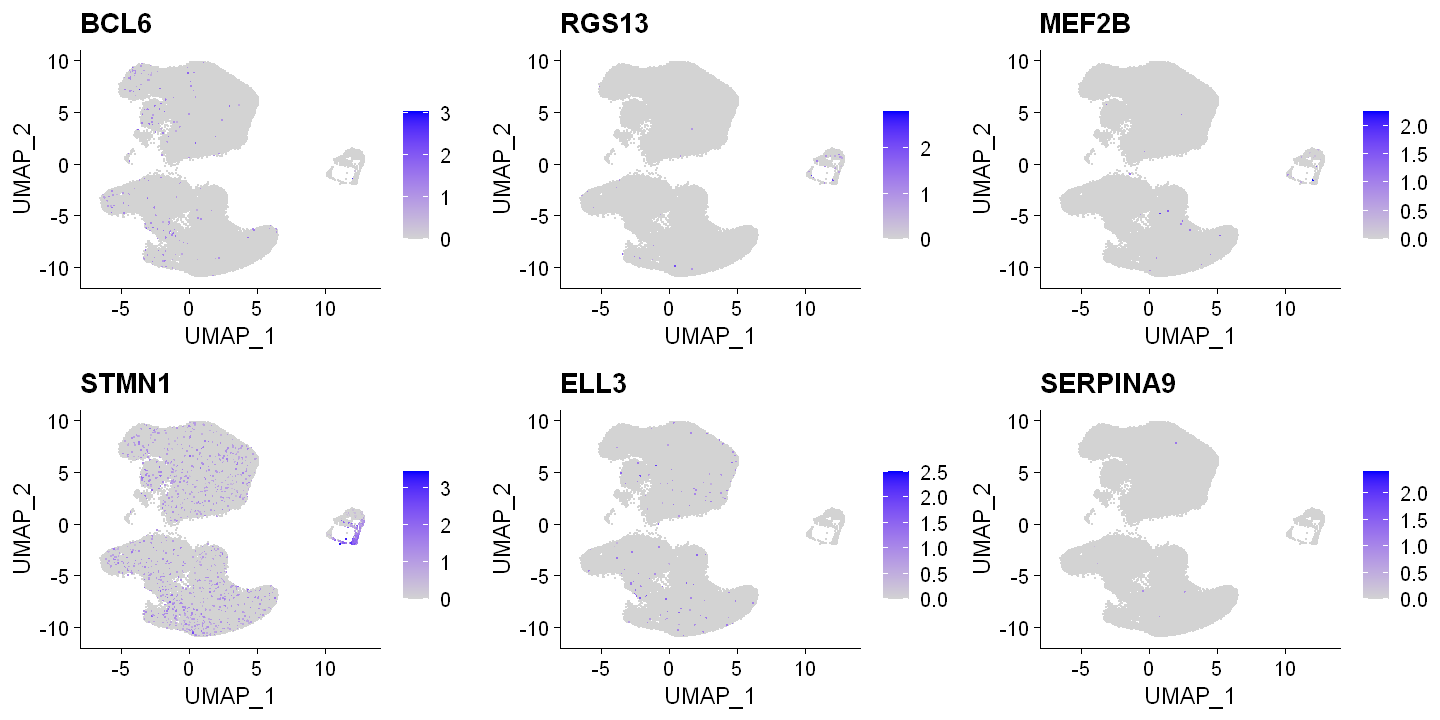

In [53]:
options(repr.plot.width=12, repr.plot.height=6)
FeaturePlot(object = immune.combined, features = GC.B, ncol =3,cols = feature.cols, min.cutoff = 0)

### Activated B cells

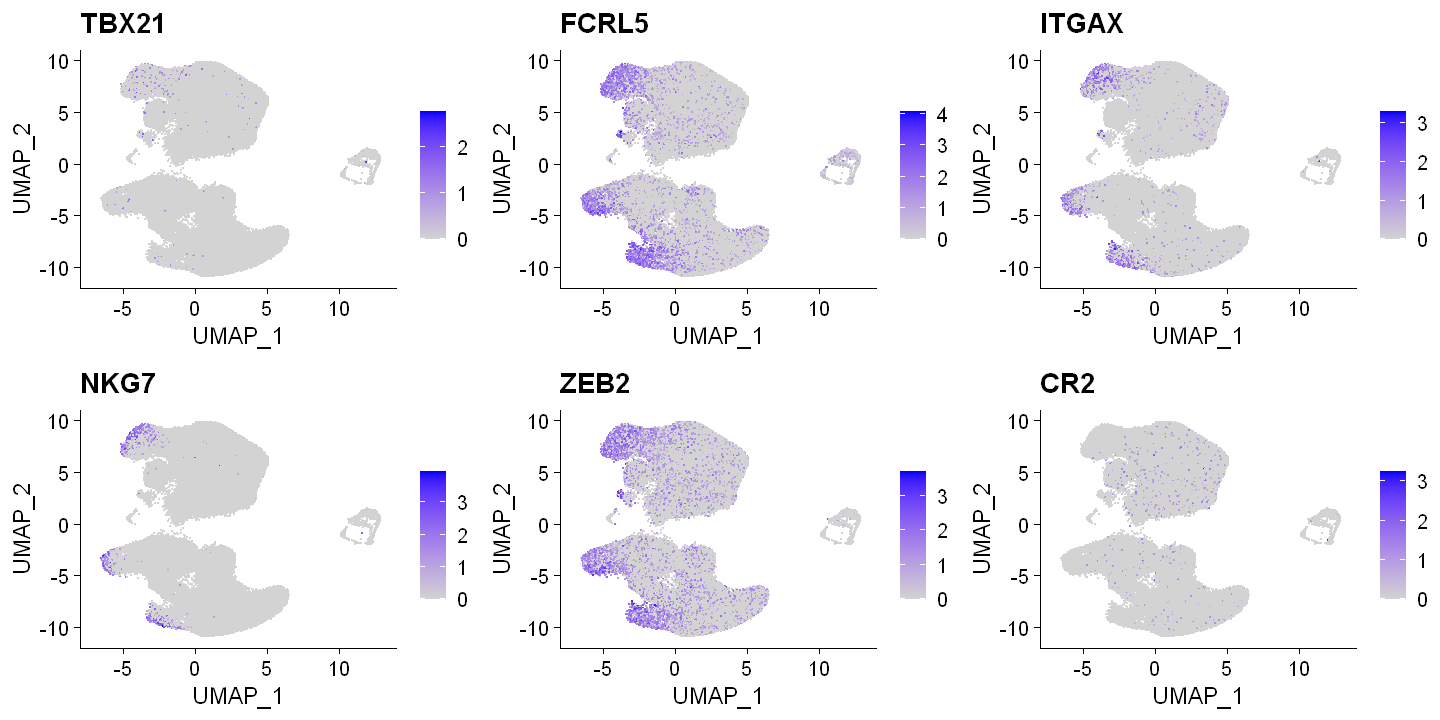

In [54]:
options(repr.plot.width=12, repr.plot.height=6)
FeaturePlot(object = immune.combined, features = ABC, ncol =3,cols = feature.cols, min.cutoff = 0)

In [17]:
levels(x = immune.combined)

[1] "0"  "1"  "10" "11" "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"

In [18]:
#0,1,2,3,4,6: RMB
#7,10: Naive
#5,8: ABC
#9,11:PB
new.cluster.ids <- c("RMB","RMB", "Naive", "PB","RMB", "RMB", # 0,1,10,11,2,3,
                     "RMB", "ABC", "RMB","Naive", "ABC",  "PB"  #4,5,6,7,8,9
                     )
names(x = new.cluster.ids) <- levels(x = immune.combined)

In [19]:
immune.combined <- RenameIdents(object = immune.combined, new.cluster.ids)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



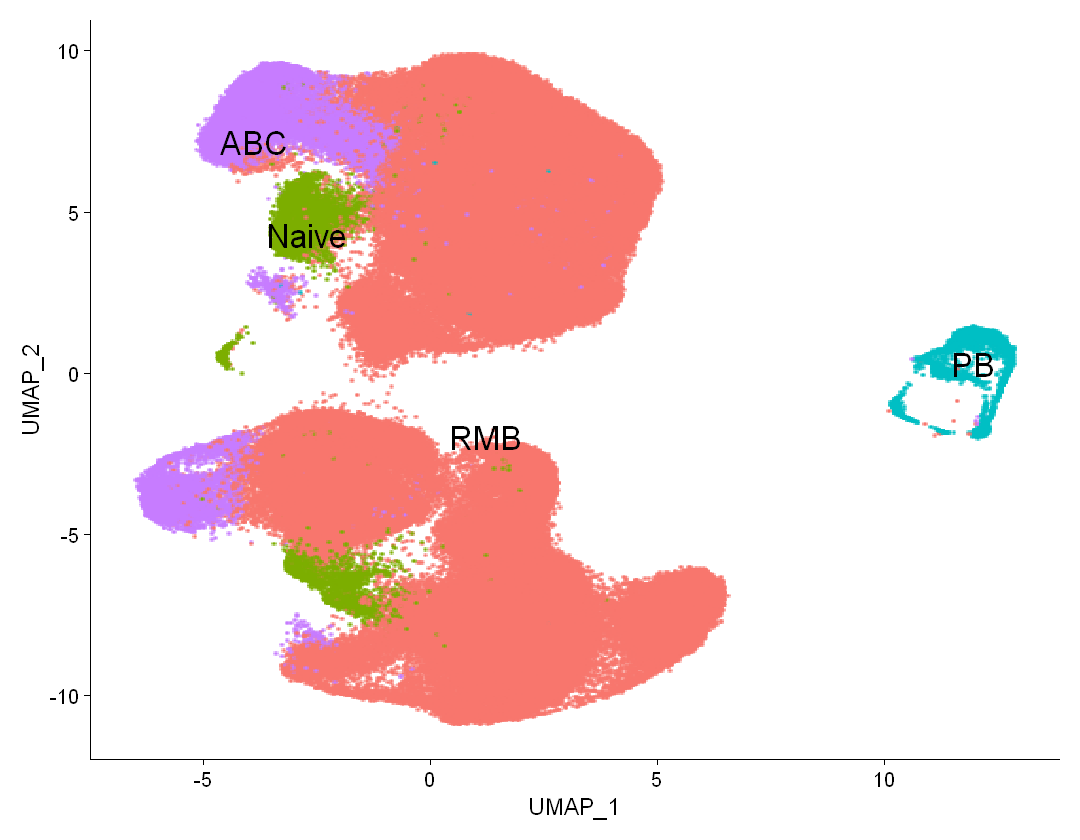

In [20]:
options(repr.plot.width=9, repr.plot.height=7)
DimPlot(object = immune.combined, reduction = "umap", label = TRUE, pt.size = 0.8,label.size=7) + NoLegend()

In [32]:
pdf("UMAP_Blood_B.pdf", width=5, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", 
        cols = c("GC"="dodgerblue2", "PB"="firebrick2", "ABC"="seagreen", 
                     "Naive"="darkgoldenrod2", "RMB"="plum2"),label = FALSE)
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

In [33]:
getwd()

[1] "D:/Storage/Ali/manuscript/supplFigures"

In [34]:
pdf("UMAP_Blood_B_bySubject.pdf", width=12, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", 
        cols = c("GC"="dodgerblue2", "PB"="firebrick2", "ABC"="seagreen", 
                     "Naive"="darkgoldenrod2", "RMB"="plum2"), split.by = "subject")
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

In [27]:
pdf("DotPlot_Blood_B_v2.pdf", width=8, height=3, useDingbats=FALSE)
DotPlot(immune.combined, assay = "RNA", features =  unique(all.B), dot.scale = 5) + RotatedAxis()
dev.off()

png 
  2

In [28]:
path.data = file.path("D:","Storage","Ali","10x","Year2","mergeBCR","data_v2")
BCR.Y1Y2.P04 = read.table(paste0(path.data, "/P04_BCR.tsv"), header=TRUE, sep="\t",as.is=T,stringsAsFactors = FALSE)
BCR.Y1Y2.P05 = read.table(paste0(path.data, "/P05_BCR.tsv"), header=TRUE, sep="\t",as.is=T,stringsAsFactors = FALSE)
BCR.Y1Y2.P11 = read.table(paste0(path.data, "/P11_BCR.tsv"), header=TRUE, sep="\t",as.is=T,stringsAsFactors = FALSE)

BCR.Y1Y2.P04 = BCR.Y1Y2.P04 %>% 
        dplyr::filter((SAMPLETYPE == "IgD-BCell" | SAMPLETYPE == "PBMC" | SAMPLETYPE == "PBMC-ASC")  
                      & DATATYPE == "singleCell") 
BCR.Y1Y2.P05 = BCR.Y1Y2.P05 %>% 
        dplyr::filter((SAMPLETYPE == "IgD-BCell" | SAMPLETYPE == "PBMC" | SAMPLETYPE == "PBMC-ASC") 
                      & DATATYPE == "singleCell")
BCR.Y1Y2.P11 = BCR.Y1Y2.P11 %>% 
        dplyr::filter((SAMPLETYPE == "IgD-BCell" | SAMPLETYPE == "PBMC" | SAMPLETYPE == "PBMC-ASC") 
                      & DATATYPE == "singleCell")
BCR.Y1Y2 = rbind(BCR.Y1Y2.P04, BCR.Y1Y2.P05, BCR.Y1Y2.P11)

Warning message in read.table(paste0(path.data, "/P04_BCR.tsv"), header = TRUE, :
"not all columns named in 'as.is' exist"
Warning message in read.table(paste0(path.data, "/P05_BCR.tsv"), header = TRUE, :
"not all columns named in 'as.is' exist"
Warning message in read.table(paste0(path.data, "/P11_BCR.tsv"), header = TRUE, :
"not all columns named in 'as.is' exist"


In [29]:
BCR.Y1Y2$CELL = as.character(BCR.Y1Y2$CELL)
BCR.Y1Y2 = BCR.Y1Y2 %>% rowwise() %>%
            mutate(BARCODE = paste(SAMPLE, strsplit(CELL, split = "-")[[1]][1], sep = "_"))

b_cell.BM <- unique((BCR.Y1Y2 %>%
            filter(BARCODE %in% Cells(immune.combined)))$BARCODE)

length(b_cell.BM)

[1] 172603

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



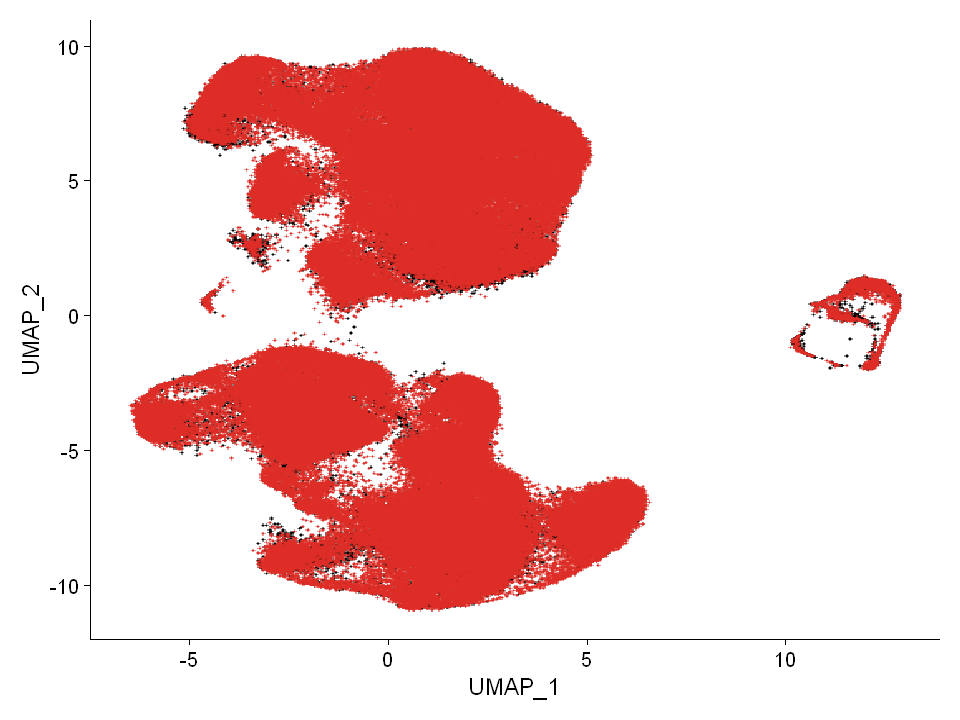

In [30]:
options(repr.plot.width=8, repr.plot.height=6)
DimPlot(object = immune.combined, reduction = "umap", cells.highlight = b_cell.BM, 
        pt.size = 0.5,label.size=6, cols="black") + NoLegend()

In [31]:
pdf("BCRonGEX_Blood_B.pdf", width=5, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", cells.highlight = b_cell.BM, 
        pt.size = 0.5,label.size=6, cols="black") + NoLegend()
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2